Revisão para a prova

In [1]:
import numpy as np
from math import factorial

from scipy import stats

**1)** Suponha que o número de meteoros encontrados por um sistema de radar em qualquer intervalo de 30 segundos sob determinadas condições é em média 1,81. Assuma que os meteoros apareçam aleatoriamente e independentemente. 

Usando a distribuição de Poisson, determine:

a)	A probabilidade de que nenhum meteoro seja encontrado em um intervalo de 1 minuto

b)	A probabilidade de que sejam observados no mínimo cinco porém não mais que oito meteoros em dois minutos de observação

**Resolução**<br>
Modelo de distribuição de Poisson: 

\\[ P(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!} \\]

onde lambda é a taxa de ocorrência

In [2]:
def func_poisson(lbd, k):
    return np.exp(-lbd)*(lbd**k)/factorial(k)


# a)
lbd = (1.81 * 60)/30  # taxa em minuto
k = 0  # frequência procurada

# probabilidade
print('P(k=0) = ', round(func_poisson(lbd, k)*100, 2), '%') # probabilidade de nenhum meteoro passar em um intervalo de 1 minuto

P(k=0) =  2.68 %


In [6]:
# b)
lbd = 1.81 * 120 / 30  # taxa em 2 minutos

# k = 5, k = 6, k=7, k=8

k = 5
print('P(k=5) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 6
print('P(k=6) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 7
print('P(k=7) = ', round(func_poisson(lbd, k) * 100, 2), '%')
k = 8
print('P(k=8) = ', round(func_poisson(lbd, k) * 100, 2), '%')

# Resposta
print("")
print(
    'P(5 <= k <=8) = ',
    round(func_poisson(lbd, 5) * 100, 2) +
    round(func_poisson(lbd, 6) * 100, 2) +
    round(func_poisson(lbd, 7) * 100, 2) +
    round(func_poisson(lbd, 8) * 100, 2), '%')

P(k=5) =  11.89 %
P(k=6) =  14.35 %
P(k=7) =  14.84 %
P(k=8) =  13.43 %

P(5 <= k <=8) =  54.51 %


In [7]:
# resolvendo com o for

prob = 0
for k in range(5, 9):
    prob = prob + round(func_poisson(lbd, k)*100, 2)

print('P(5<= k <=8) = ', prob, '%')

P(5<= k <=8) =  54.51 %


In [8]:
# OUTRA FORMA DE RESOLVER

from scipy import stats

# X~Poisson(k*lambda)

# a)
# P(X = 0| lambda = 2*1.81)
k = 0 # freq procurada
lbd = 1.81 * 60 / 30

rv = stats.poisson(lbd)
rv.pmf(k)

0.026782676492638175

**2**) Suponha que a probabilidade dos pais  terem um  filho(a) com cabelos loiros seja $\frac{1}{4}$. Se houverem 6 crianças na 
família, qual é a probabilidade de que metade delas terem cabelos loiros? Resolva pela distribuição binomial.

Resolução:

\\[P(A) = \sum P(\{ (e_1,\dotsc,e_N) \})  =  \binom{N}{k} \cdot p^kq^{N-k}\\]

onde p é a probabilidade de sucesso, q é a probabilidade de insucesso, k é a frequencia observada

In [9]:
p = 1/4  # probabilidade de sucesso

n = 6  # número de filhos

k = 3  # frequencia observada, procurada

q = 1 - p  # probabilidade de insucesso

In [10]:
def func_binomial(n, p, k):
    C = factorial(n) / (factorial(n - k) * factorial(k))
    return C * np.power(p, k) * np.power(1 - p, n - k)


print('Probabilidade: ', round(func_binomial(n, p, k) * 100, 2),'%')  #Probabilidade da metade das crianças serem loiras

Probabilidade:  13.18 %


In [11]:
# outra forma de resolver

# X~Bin(6,1/4)
#P(X = 3)
rv = stats.binom(n, p)
rv.pmf(k)

0.13183593749999992

**3)** Se a probabilidade de atingir um alvo num único disparo é 0,3, qual é a probabilidade de que em 4 disparos o alvo seja atingido no mínimo 3 vezes? Resolva pela distribuição binomial

In [12]:
p = 0.3

n = 4

# k >= 3 _> ele pode ser 3 ou 4

print('Probabilidade k = 3: ', round(func_binomial(n, p, 3) * 100, 2), '%')
print('Probabilidade k = 4: ', round(func_binomial(n, p, 4) * 100, 2), '%')

print(
    'Probabilidade k >= 3: ',
    round(func_binomial(n, p, 3) * 100, 2) +
    round(func_binomial(n, p, 4) * 100, 2), '%')

Probabilidade k = 3:  7.56 %
Probabilidade k = 4:  0.81 %
Probabilidade k >= 3:  8.37 %


In [13]:
# usando o for para fazer a somatória

prob = 0
for k in range(3, 5):
    prob += round(func_binomial(n, p, k) * 100, 2)

print('Probabilidade k >= 3: ', prob, '%')

Probabilidade k >= 3:  8.37 %


In [14]:
# outra forma de resolver

n = 4
p = 0.3
k = 3

rv = stats.binom(n, p)
rv.pmf(k)

0.0756

**4**) Alberto diz que pode prever o futuro das colheitas. A comunidade em que ele vive, interessadíssima nesses poderes, se mobilizou para verificar o fato. Foi averiguado que ele acerta 80% das vezes em que diz que os tomates não vão germinar e 90% das vezes em que diz que os tomates vão germinar. Os tomates não germinam em 10% das colheitas. Se Alberto anunciar a perda da colheita, qual é a probabilidade real de que eles não germinem?

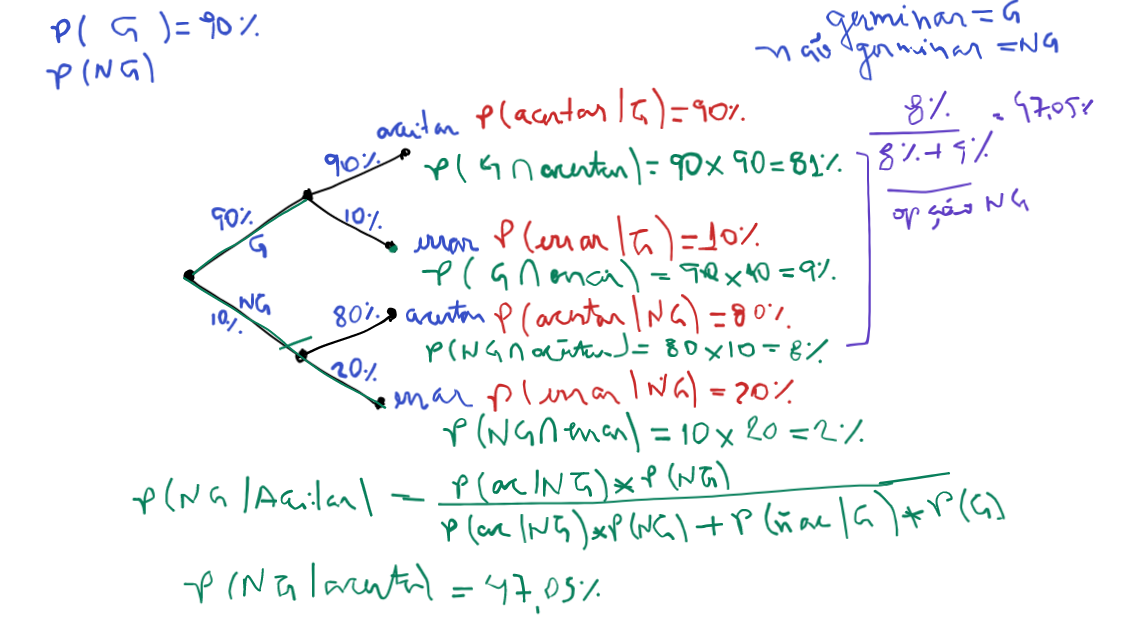